In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

im = './testImages/'

In [80]:
def readImage(sampleSize, prefix, x, y):
    """ 
        Load images under given prefix to the numpy array of dimentions (sampleSize, width*height)   
    
        Args:
            sampleSize: number of images to load
            prefix: literal prefix underf which dimilar images are stored
            x: width of the image
            y: height of the image
                    
        Returns: 
            images: numpy array of dimentions (sampleSize, x * y)
            
    """   
    
    images = np.zeros((sampleSize,x * y,1))
    for i in range (sampleSize):
        #image = cv2.imread(im + prefix + str(i) + '.png',0).reshape((-1,1))
        images[i,:,:] = cv2.imread(im + prefix + str(i) + '.png',0).reshape((-1,1))
                                    
    return images

In [112]:
def makePrototype(images):
    """
    Create a prototype of the image in which cell are stored the probability of the pixel
    be black of white
    
    Args:
        images : numpy array of dimentions (sampleSize, x, y)
        x : width of the image
        y : height of the image
        
    Returns:
        A prototype of the image in which cell are stored the probability of the pixel
    
    """
    
    _, h, _ = images.shape
    proto = np.zeros((h,1))
    num_frames, _, _ = images.shape
    
    for pixel in range (h):
        for frame in range(num_frames):
            proto[pixel, 0] += images[frame, pixel, 0]
        proto[pixel,0] = proto[pixel,0]/num_frames
    
    proto[:,0] = np.where(proto[:,0] == 0, 0.000001, proto[:,0])
    proto[:,0] = np.where(proto[:,0] == 255, 254.999999, proto[:,0])
    return proto

In [125]:
def getWeight(proto):
    
    n,_ = proto.shape
    weights = np.zeros((n+1))
    
    proto_norm = proto/255
    
    w_nPlus1 = np.sum(np.log(1-proto_norm))
    
    weights[n] = w_nPlus1
    for w in range (n):
        weights[w] = np.log(1/(1-proto_norm[w,0]))
    
    return weights

In [126]:
def evaluateImage(image, weight):
    stack = image.reshape((-1,1))
    h, _ = stack.shape
    x = np.zeros(h+1)
    x[0:h] = stack[:,0]
    x[h] = 1
    
    
    return np.dot(x, weight)

[ 99311.35656671 118611.39086777]


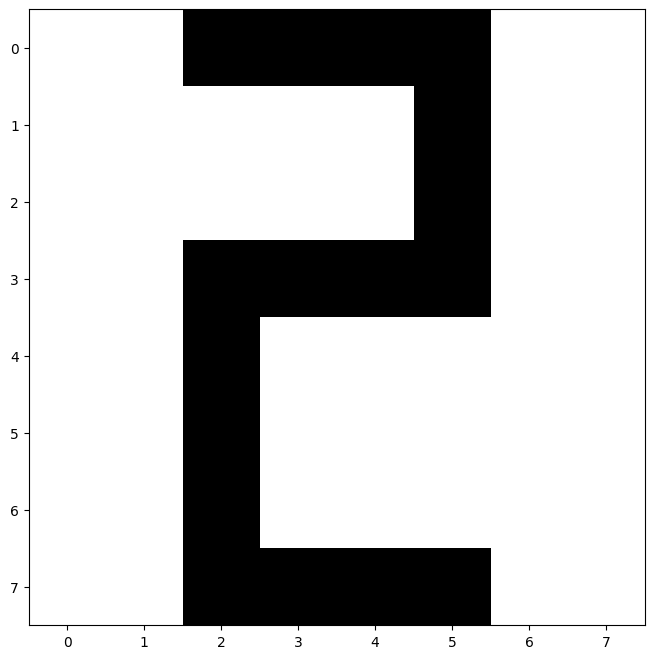

In [127]:
image = cv2.imread(im + '00.png',0)
x,y = 8,8 # Image Size
zeroes = readImage(10, '0', x, y)
frame, _, _ = zeroes.shape
twos = readImage(10, '2', x, y)
p_zeroes = makePrototype(zeroes)
p_twos = makePrototype(twos)

w_zeroes = getWeight(p_zeroes)
w_twos = getWeight(p_twos)

zero = cv2.imread(im + '23.png',0)
#two = cv2.imread(im + '23.png',0)
res = np.zeros(2)

res[0] = evaluateImage(zero, w_zeroes)
res[1] = evaluateImage(zero, w_twos)

print(res)


plt.imshow(zero, cmap = 'gray')


In [72]:
image = cv2.imread(im + '00.png',0)
img = image.reshape((-1,1))
print(img.shape)

(64, 1)
